In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()
# sns.despine()
sns.set_style('white')
cs = sns.color_palette()
cs

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

T_0 : 0.5, 1, -3-, -5-
t: 0.1, 0.2, 0.3, 0.5, 0.7

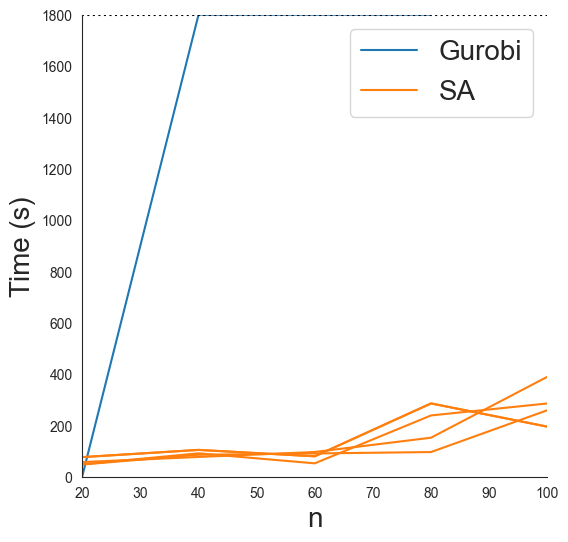

In [26]:
df_m = pd.read_csv('./archive/MILP.csv')
df_s = pd.read_csv('./archive/SA.csv')
time_m = df_m[['n','n_d','time']]
time_s = df_s[['n','n_d','seed','time']]
# display(time_m,time_s)
fig,ax = plt.subplots(1,1,figsize=(6,6))
n_d=2
sns.despine()
sns.lineplot(ax=ax,x='n',y='time',data=time_m[time_m['n_d']==n_d],label='Gurobi')
for seed in [0,1,2,3]:
    sns.lineplot(ax=ax,x='n',y='time',data=time_s[(time_s['n_d']==n_d) &(time_s['seed']==seed)],color=cs[1])
sns.lineplot(ax=ax,x='n',y='time',data=time_s[(time_s['n_d']==n_d) &(time_s['seed']==seed)],color=cs[1],label='SA')
ax.hlines(y=1800,xmin=0,xmax=100,color='black',linestyle=':')

ax.set_xlim([20,100])
ax.set_ylim([0,1800])
ax.set_xlabel('n',fontsize=20)
ax.set_ylabel('Time (s)',fontsize=20)
plt.legend(fontsize=20)

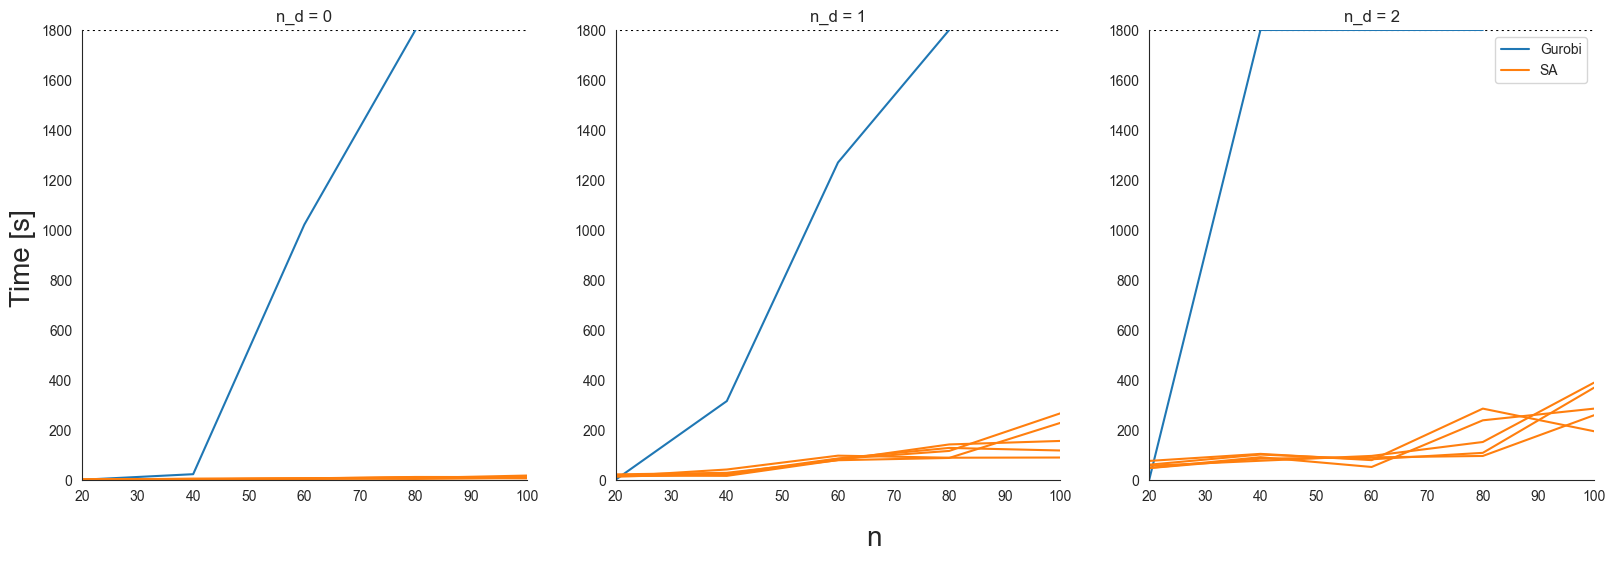

In [35]:
df_m = pd.read_csv('./archive/MILP.csv')
df_s = pd.read_csv('./archive/SA.csv')
time_m = df_m[['n','n_d','time']]
time_s = df_s[['n','n_d','seed','time']]
# display(time_m,time_s)
fig,ax = plt.subplots(1,3,figsize=(18,6))
sns.despine()
for n_d in [0,1,2]:
    ax[n_d].set_title(f'n_d = {n_d}')
    ax[n_d].hlines(y=1800,xmin=0,xmax=100,color='black',linestyle=':')
    ax[n_d].set_ylim([0,1800])
    ax[n_d].set_xlim([20,100])
    if n_d==2:
        sns.lineplot(ax=ax[n_d],x='n',y='time',data=time_m[time_m['n_d']==n_d],label='Gurobi')
    else:
        sns.lineplot(ax=ax[n_d],x='n',y='time',data=time_m[time_m['n_d']==n_d])
    for seed in [0,1,2,3,4]:
        if n_d==2 and seed==0:
            sns.lineplot(ax=ax[n_d],x='n',y='time',data=time_s[(time_s['n_d']==n_d) &(time_s['seed']==seed)],color=cs[1],label='SA')
            
        else:
            sns.lineplot(ax=ax[n_d],x='n',y='time',data=time_s[(time_s['n_d']==n_d) &(time_s['seed']==seed)],color=cs[1])
    ax[n_d].set_xlabel('')
    ax[n_d].set_ylabel('')
plt.legend()
plt.subplots_adjust(left=0.06,bottom=0.13)
fig.supxlabel('n',fontsize=20)
fig.supylabel('Time [s]',fontsize=20)
plt.savefig('./figure/SA_time.png', dpi = 300, bbox_inches = 'tight')

<Axes: xlabel='n'>

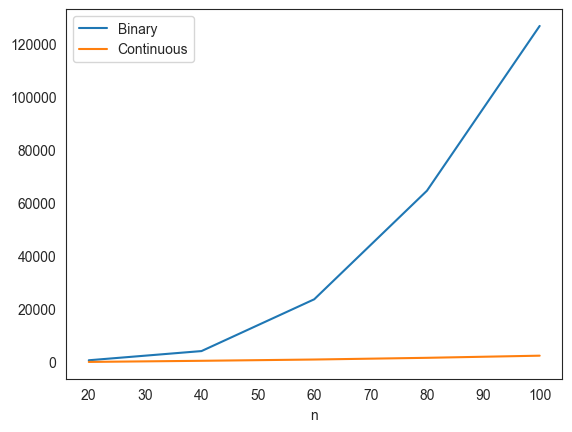

In [28]:
df = pd.read_csv('./results/MILP.csv')
fig,ax=plt.subplots()
df.plot(ax=ax,x='n',y='Binary')
df.plot(ax=ax,x='n',y='Continuous')

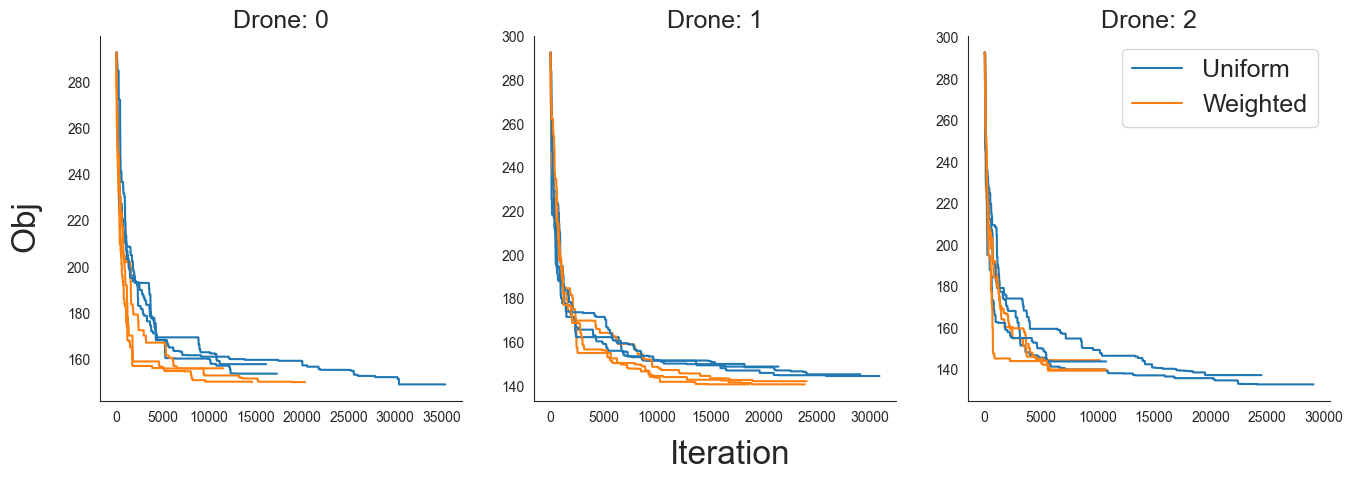

In [12]:
dct1 = {}
dct2 = {}
n=60
seeds=[3,2,4]
ns = [0,1,2]
for n_d in ns:
    for seed in seeds:
        dct2[n_d,seed]=np.load(f"./logs/SA_{n}_{n_d}_{seed}.npy")
        dct1[n_d,seed]=np.load(f"./logs/SA_uni_{n}_{n_d}_{seed}.npy")
        
# xs=[[0,12000],[0,25000],[0,32000]]
# ys=[[50,100],[110,240],[160,350]]
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.despine()
for i in range(len(ns)):
    n=ns[i]
    for j in range(len(seeds)):
        seed=seeds[j]
        if seed==4:

            ax[i].plot(dct1[n,seed],color=cs[0],label='Uniform')
            ax[i].plot(dct2[n,seed],color=cs[1],label='Weighted')
        else:
            ax[i].plot(dct1[n,seed],color=cs[0])
            ax[i].plot(dct2[n,seed],color=cs[1])
        ax[i].set_title(f"Drone: {n}",fontsize=18)
        # ax[i].set_title(f"B (n = {n})")
    # ax[i].set_xlim(xs[i])
    # ax[i].set_xlim(xs[i])
    # ax[i].set_ylim(ys[i])
    # ax[i].set_ylim(ys[i])
plt.subplots_adjust(left=0.08,bottom=0.15)
fig.supxlabel('Iteration', fontsize = 24)
fig.supylabel('Obj', fontsize = 24)
plt.legend(fontsize=18)
# plt.savefig('./figure/SA_strategy.png', dpi = 300, bbox_inches = 'tight')

/var/folders/dc/689_00mn1sg6hs12x_6468100000gn/T/ipykernel_32123/3583432621.py:28: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.boxplot(x='n', hue='n_d', y='obj', data=df,palette=cs, boxprops=dict(alpha=.7))
/var/folders/dc/689_00mn1sg6hs12x_6468100000gn/T/ipykernel_32123/3583432621.py:33: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.swarmplot(x='n',hue='n_d', y='obj', data=df2, alpha=0.8,size=8, palette=cs,marker='s',dodge=True)


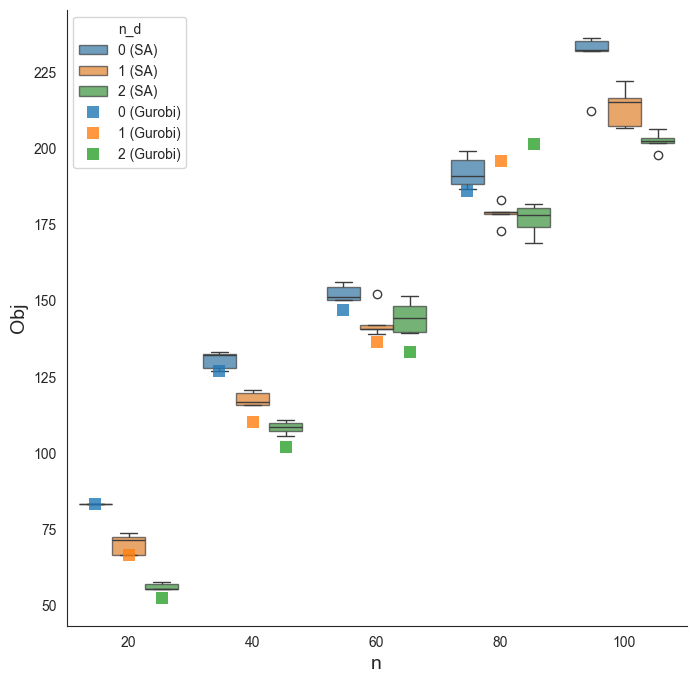

In [28]:
plt.figure(figsize=(8,8))
# sns.set_theme()
df = pd.read_csv('./archive/SA.csv')
df['n_d'] = df['n_d'].astype(str) + ' (SA)'
df2 = pd.read_csv('./archive/MILP.csv')
df2['n_d'] = df2['n_d'].astype(str) + ' (Gurobi)'


# sns.boxplot(showmeans=True,
#             meanline=True,
#             meanprops={'color': 'gray', 'ls': '-', 'lw': 2},
#             medianprops={'visible': False},
#             whiskerprops={'visible': False},
#             zorder=10,
#             x='n',
#             hue=
#             y='obj',
#             data=df,
#             showfliers=False,
#             showbox=False,
#             showcaps=False)

# sns.swarmplot(x='n',hue='n_d', y='obj', data=df,alpha=0.8,size=8,palette=cs[:3])
cs = sns.color_palette()  # デフォルトの Seaborn カラーパレット
cs_rgba = [(r, g, b, 0.9) for r, g, b in cs[:3]]  # α=0.5 (50% の透明度)

# ボックスプロットを作成
ax = sns.boxplot(x='n', hue='n_d', y='obj', data=df,palette=cs, boxprops=dict(alpha=.7))
# sns.move_legend(ax,'none')
# sns.catplot(x='n', y='obj', hue='n_d', data=df, kind='box', col='n_d')
# sns.boxplot(x='ns', y='obj', data=df,palette=cs[:3], boxprops=dict(alpha=.7))
plt.legend().remove()
sns.swarmplot(x='n',hue='n_d', y='obj', data=df2, alpha=0.8,size=8, palette=cs,marker='s',dodge=True)
# sns.swarmplot(x='ns', y='obj', data=df2,size=8, palette=cs[:3])

plt.legend(title='n_d')
# plt.grid(axis='y', linestyle='dotted')
plt.xlabel("n", fontsize=14)
plt.ylabel("Obj", fontsize=14)
sns.despine()
# plt.savefig('./figure/SA_std.png', dpi = 300, bbox_inches = 'tight')